# InfiniBand Traffic Monitor Results

## Python Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pprint import pprint

## Configuration

In [22]:
# Color palette
CB_color_cycle = {
    "blue":'#377eb8',
    "orange":'#ff7f00',
    "green":'#4daf4a',
    "pink":'#f781bf',
    "brown":'#a65628',
    "purple":'#984ea3',
    "gray":'#999999',
    "red":'#e41a1c',
    "yellow":'#dede00'
}

nodes = ["o186i221", "o186i222"]
monitor_id = "root-20230911-220744"
experiment_dir = "ibmon/example"
experiment = f"{monitor_id}_total_aggregate.ibmon.csv"

dataframe = pd.read_csv(f"{experiment_dir}/{experiment}", header=0)

#dataframe
KB = 1000
MB = 1000 * KB
GB = 1000 * MB
dataframe

,timestamp,PortXmitData_mlx5_0_o186i221,PortRcvData_mlx5_0_o186i221,PortXmitPkts_mlx5_0_o186i221,PortRcvPkts_mlx5_0_o186i221,PortXmitWait_mlx5_0_o186i221,PortXmitData_mlx5_1_o186i221,PortRcvData_mlx5_1_o186i221,PortXmitPkts_mlx5_1_o186i221,PortRcvPkts_mlx5_1_o186i221,...,PortRcvPkts_sum_o186i222,PortRcvData_sum_o186i222,PortXmitData_sum_o186i222,PortXmitWait_sum_o186i222,PortXmitPkts_sum_o186i222,PortRcvData_sum_aggregate,PortXmitPkts_sum_aggregate,PortXmitWait_sum_aggregate,PortRcvPkts_sum_aggregate,PortXmitData_sum_aggregate
0,0,117061,150992,1862,2338,0,109438,146517,1604,2203,...,8868,584856,438200,0,6542,1174849,13223,0,17822,883014
1,1,1528,1360,40,29,0,1080,1080,15,15,...,58,3426,3498,0,65,7018,136,0,118,7258
2,2,576,576,8,8,0,1087,1098,16,16,...,27,1944,1944,0,27,4770,67,0,67,4759
3,3,751,647,19,15,0,864,864,12,12,...,74,4547,4720,0,78,7048,123,0,115,7361
4,4,1610,1429,41,33,0,1314,1303,19,19,...,48,2585,2733,0,56,6915,140,0,124,7277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,70,1511,1334,38,30,0,1080,1080,15,15,...,65,3791,3975,0,73,7492,144,0,128,7871
71,71,1188,1109,35,28,0,864,944,12,13,...,72,4236,4158,0,77,7169,134,0,125,6930
72,72,1295,1415,35,36,0,864,1161,12,21,...,87,4025,3032,0,59,7983,121,0,174,6107
73,73,1358,1496,36,37,0,1080,1410,15,25,...,101,4841,3669,0,69,9526,136,0,198,7259


## Plotting

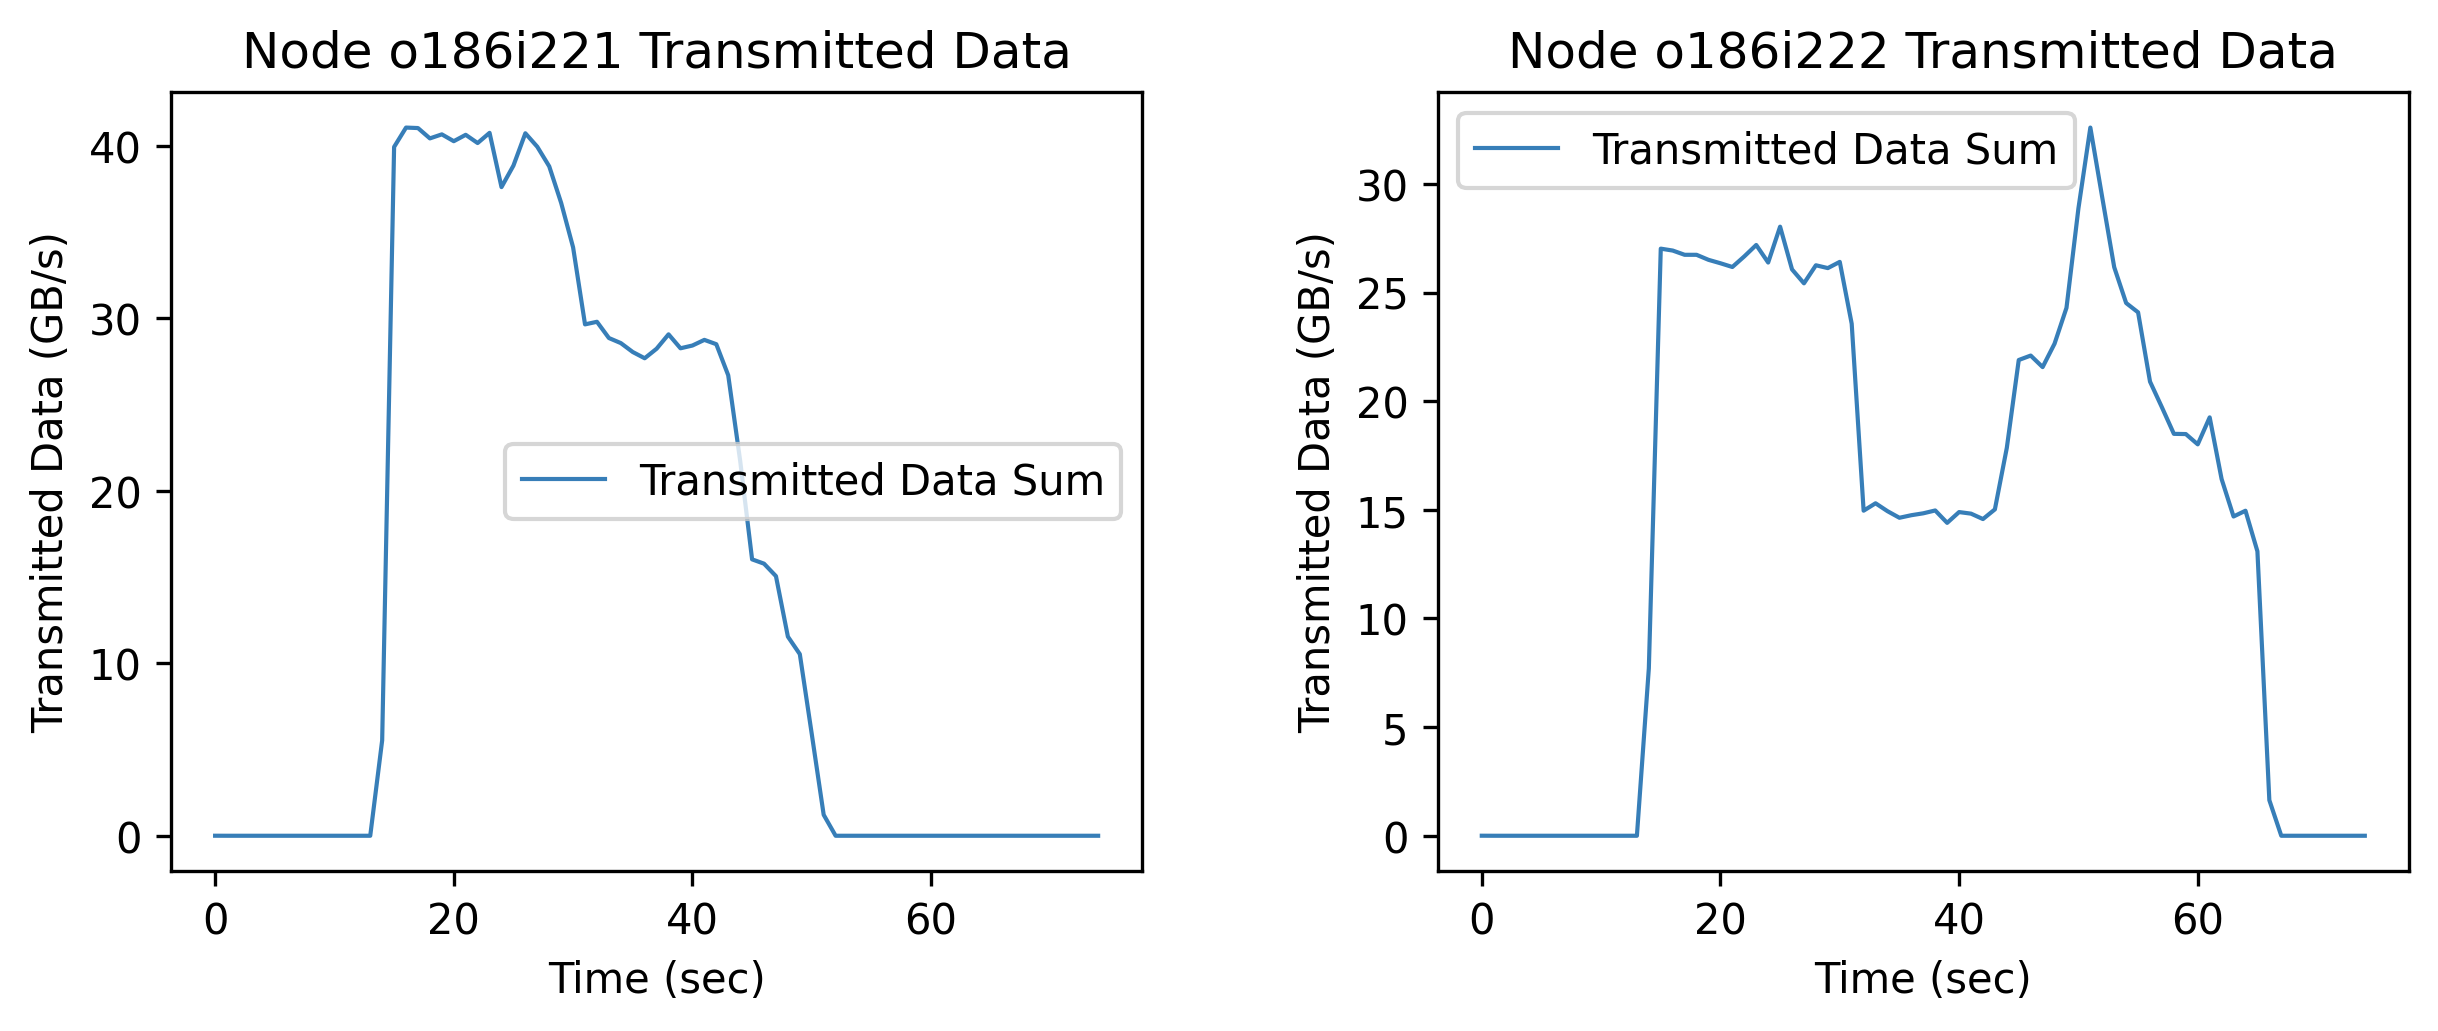

In [21]:
number_rows = 1
number_cols = 2

fig, ax = plt.subplots(nrows=number_rows, ncols=number_cols, figsize=(9,4), dpi=300)
fig.tight_layout(pad=4)

ax[0].plot(
    dataframe["timestamp"],
    dataframe[f"PortXmitData_sum_{nodes[0]}"] * 4 / GB,
    lw=1, label="Transmitted Data Sum",
    color=CB_color_cycle["blue"]
)

ax[0].set_title(f"Node {nodes[0]} Transmitted Data")
ax[0].set_ylabel("Transmitted Data (GB/s)")
ax[0].set_xlabel("Time (sec)")
ax[0].legend()


ax[1].plot(
    dataframe["timestamp"],
    dataframe[f"PortXmitData_sum_{nodes[1]}"] * 4 / GB,
    lw=1, label="Transmitted Data Sum",
    color=CB_color_cycle["blue"]
)

ax[1].set_title(f"Node {nodes[1]} Transmitted Data")
ax[1].set_ylabel("Transmitted Data (GB/s)")
ax[1].set_xlabel("Time (sec)")
ax[1].legend()

plt.show()